In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pairinteraction import ureg
from pairinteraction.green_tensor import (
    GreenTensorCavity,
)

In [2]:
omega = ureg.Quantity(10.5, "GHz")
wavelength = omega.to("cm", "spectroscopy")

print(f"{omega=}, {wavelength=}")

omega=<Quantity(10.5, 'gigahertz')>, wavelength=<Quantity(2.85516627, 'centimeter')>


In [ ]:
freq = ureg.Quantity(10.5277 * 1e9, "Hz")
omega = 2 * np.pi * freq
epsilon = -29761.679813480383 + 32823550.74763878j  # Ag at omega = 2 * np.pi * 10.5277GHz
wavelength = freq.to("cm", "spectroscopy")
wavelength_cm = freq.to("cm", "spectroscopy").m
distances = np.linspace(0.1 * wavelength_cm, wavelength_cm, 50)

z_list = [0.05, 0.1, 0.25, 0.5, 1]

V_dict = {}
for i, z in enumerate(z_list):
    print(f"Calculating z {i + 1}/{len(z_list)}: {z} λ", 30 * " ")
    z_cm = z * wavelength_cm

    tensor_list = []
    for j, d in enumerate(distances):
        print(f"Calculating distance {j + 1}/{len(distances)}: {d} cm", end="\r")
        gt = GreenTensorCavity()
        gt.set_atom_positions([0, 0, 0], [d, 0, 0], "cm")
        gt.set_electric_permitivity(1)
        gt.set_electric_permitivity_surfaces(epsilon1=epsilon, epsilon2=epsilon)
        gt.set_surface_positions(z1=z_cm, z2=-z_cm, unit="cm")
        tensor = gt.get_dipole_dipole(omega=omega.m, omega_unit=str(omega.units))
        tensor_list.append(tensor)

    V_dict[z] = np.array([np.abs(np.real(tensor[0, 0].m)) for tensor in tensor_list])

Calculating z 1/5: 0.05 λ
Calculating z 2/5: 0.1 λ50: 2.8476538845141866 cm
Calculating z 3/5: 0.25 λ0: 2.8476538845141866 cm
Calculating z 4/5: 0.5 λ50: 2.8476538845141866 cm
Calculating z 5/5: 1 λ0/50: 2.8476538845141866 cm


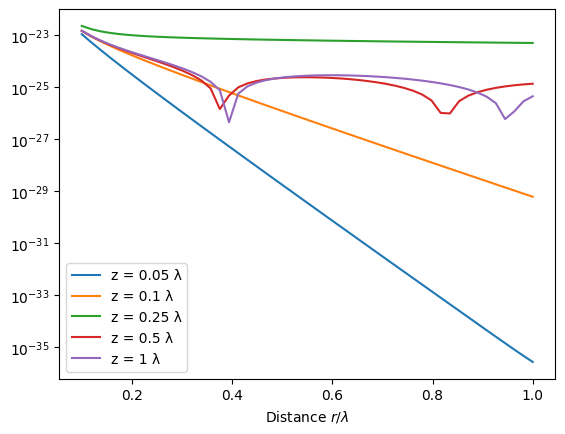

In [4]:
fig, ax = plt.subplots()

for z, V in V_dict.items():
    ax.plot(distances / wavelength.m, np.real(V), label=f"z = {z} λ")

ax.set_yscale("log")

ax.set_xlabel(r"Distance $r / \lambda$")

ax.legend()
plt.show()